In [1]:
import pandas as pd
df = pd.read_csv('../../data/output_data_chula.csv')
df

,article_id,Title,Abstract,Publication Date,Affiliations,Keywords,years
0,1,Microencapsulated basil oil (Ocimum basilicum ...,Copyright © 2022 by Animal BioscienceObjective...,2022-05-01,"{'Thailand': ['Chulalongkorn University', 'Res...","['Antioxidant Capacity', 'Basil Oil', 'Broiler...",2022
1,2,Perceptions Regarding the SARS-CoV-2 Pandemic'...,© 2022 Lippincott Williams and Wilkins. All ri...,2022-04-01,"{None: ['Neurological Surgery'], 'United State...","['care delivery', 'COVID-19', 'neurocritical c...",2022
2,3,Construction of a short version of the Montrea...,© 2022 The Author(s). Published by Informa UK ...,NaN,"{'Thailand': ['Chulalongkorn University'], 'Bu...","['Alzheimer’s disease', 'cognitive disorders',...",2022
3,4,The effect of strain and pressure on the elect...,© 2022 Author(s).Different theoretical methodo...,2022-02-14,"{'Sweden': ['Linköping University'], 'Thailand...",[],2022
4,5,Dynamic Cardiopulmonary and Metabolic Function...,"© 2022, Journal of Exercise Physiology Online....",NaN,"{'Thailand': ['Chulalongkorn University', 'Mah...","['Bra', 'Cardiorespiratory function', 'Metabol...",2022
...,...,...,...,...,...,...,...
20211,20212,Estimating actual evapotranspiration from NDVI...,© 2018 The authors and IOS Press. All rights r...,NaN,"{'Thailand': ['Khon Kaen University', 'Chulalo...","['Actual evapotranspiration', 'Landsat 8', 'ND...",2018
20212,20213,Genome-wide association study identified new s...,© 2018 The Author(s).We have performed a genom...,2018-12-01,"{'Japan': ['University of Tokyo', 'National Ce...",[],2018
20213,20214,Effects of transcranial direct current stimula...,"© 2018, Medical Association of Thailand. All r...",2018-01-01,"{'Thailand': ['Veteran General Hospital', 'Chu...","['Motor cortex', 'Rehabilitation', 'Stroke', '...",2018
20214,20215,Prevalence and risk factors for canine cogniti...,© 2018 Chulalongkorn University Printing House...,2018-09-01,"{'Thailand': ['Chulalongkorn University'], 'Un...","['Canine cognitive dysfunction syndrome', 'Pre...",2018


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Drop rows where 'Title' is NaN
df.dropna(subset=['Title'], inplace=True)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sirasittanrattanawong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


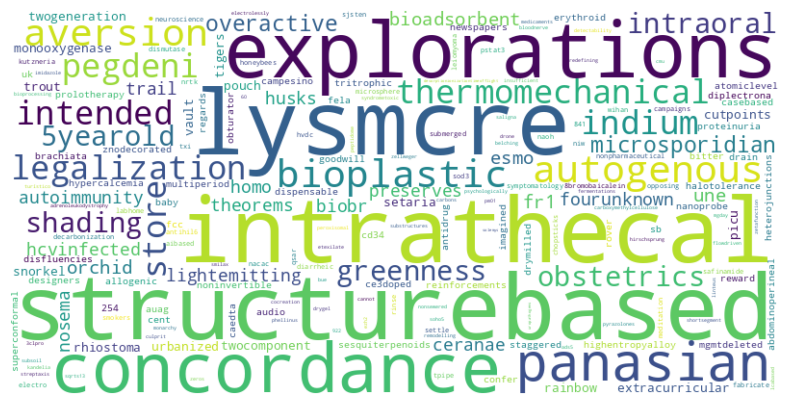

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # English stop words
# Adding custom stop words
custom_stop_words = {'year', '2023'}
stop_words.update(custom_stop_words)


recent_df = df[df['years'] == 2023]
older_df = df[(df['years'] >= 2018) & (df['years'] <= 2022)]

# Function to preprocess and extract words
def preprocess_and_extract_words(text_series):
    text_series = text_series.str.lower().str.replace('[^\w\s]', '', regex=True)
    words = text_series.str.split().apply(lambda x: [word for word in x if word not in stop_words]).explode()
    return words

# Extracting words
recent_words = preprocess_and_extract_words(recent_df['Title'])
older_words = preprocess_and_extract_words(older_df['Title'])

# Calculating word frequencies
recent_freq = Counter(recent_words)
older_freq = Counter(older_words)

# Finding words that have significantly increased in frequency
emerging_words = {}
for word, freq in recent_freq.items():
    old_freq = older_freq.get(word, 0)
    if freq > 10 * old_freq:  
        emerging_words[word] = freq

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(emerging_words)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


